This is the Jupyter notebook with the code examples for the post about [Seaborn line plots](https://www.marsja.se/seaborn-line-plots-multiple). You'll also find the code for creating the first time series (line graph) presented in the post. That is, you'll find out how to scrape a Wikipedia table of the COVID-19 cases in Sweden and, then, plot a line graph with the days on the x-axis. Enjoy!

## Simulate data
Here's how to simulate the data, for the first few Seaborn line graph examples, using NumPy:

In [39]:
import numpy as np
import pandas as pd

# Setting a random seed for reproducibility
np.random.seed(3)

# Numpy Arrays for means and standard deviations
# for each dose (variable x)
mus_x = np.array([21.1, 29.9, 36.1])
sd_x = np.array([2.1, 1.94, 2.01])

# Numpy Arrays for means and standard deviations
# for each dose (variable y)
mus_y = np.array([64.3, 78.4, 81.1])
sd_y = np.array([2.2, 2.3, 2.39])

# Simulating data for the x and y response variables
x = np.random.normal(mus_x, sd_x, (30, 3))
y = np.random.normal(mus_y, sd_y, (30, 3))

# Creating the "doses"
day = ['d1']*30 + ['d2']*30 + ['d3']*30

# Creating a DataFrame from a Dictionary
df = pd.DataFrame({'Day':day, 'x':np.reshape(x, 90, order='F'),
                  'y':np.reshape(y, 90, order='F')})
df.head()

,Day,x,y
0,d1,24.856120,62.999627
1,d1,17.186665,65.130050
2,d1,20.926243,65.793958
3,d1,20.097842,69.047929
4,d1,22.950768,64.124570


## Simple Seaborn Line Graph Example
Here's the code for the first example using the simulated data:

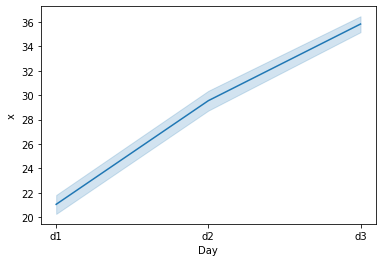

In [40]:
import seaborn as sns

sns.lineplot('Day', 'x', data=df)

### Simple Seaborn Line Chart w/o Confidence Interval (CI)
Here's how to remove the CI:

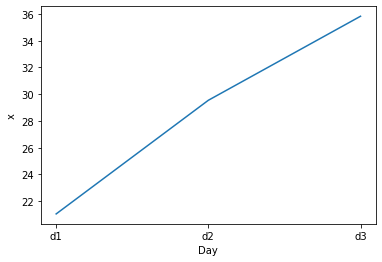

In [41]:
sns.lineplot('Day', 'x', ci=None, data=df)

### Simple Seaborn Line Plot w Error Bars
Here's how to add error bars:

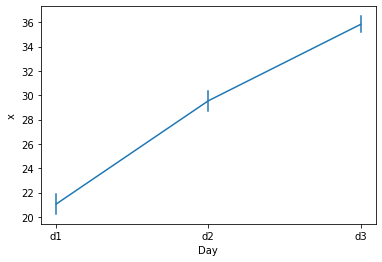

In [42]:
sns.lineplot('Day', 'x', ci=95, 
             err_style='bars', data=df)

### Changing the Color of a Seaborn Line Chart
Here's how to change the color (to red):

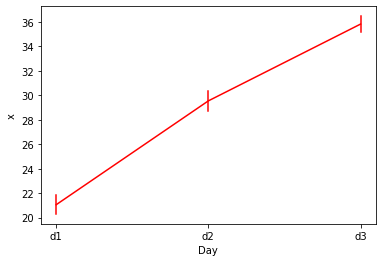

In [43]:
sns.lineplot('Day', 'x', ci=95, color='red',
             err_style='bars', data=df)

### How to Add Dots to the Line Plot
In the next code chunk, we'll add dots (markers) to the line plot with Seaborn

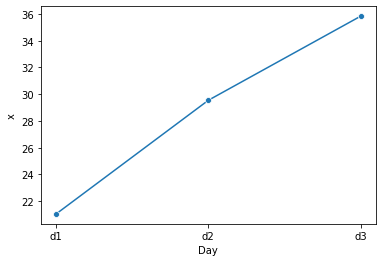

In [44]:
sns.lineplot('Day', 'x', ci=None, marker='o',
             data=df)

## Multiple Lines on Seaborn Line Charts
In this section, we'll plot multiple lines on the plot. We'll also learn how to change palette, markers, line types, among othe things:

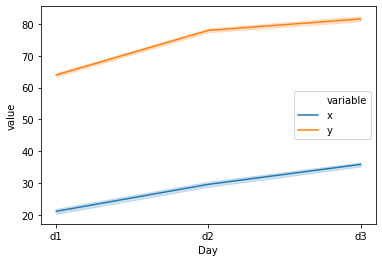

In [45]:
sns.lineplot('Day', 'value', hue='variable', 
             data=pd.melt(df, 'Day'))

### Same as Above but using pd.melt differently:

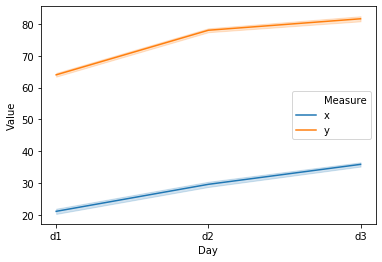

In [46]:
df2 = pd.melt(df, 'Day', var_name='Measure', 
              value_name='Value')

sns.lineplot('Day', 'Value', hue='Measure', 
             data=df2)

### Changign the Linetypes:
Linetypes of the Seaborn line plot can be changed using the *style* parameter.

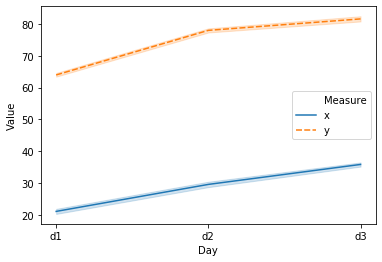

In [47]:
sns.lineplot('Day', 'Value', hue='Measure',
             style='Measure', data=df2)

It's possible to customize the linetypes (i.e., decide which types of line we want):

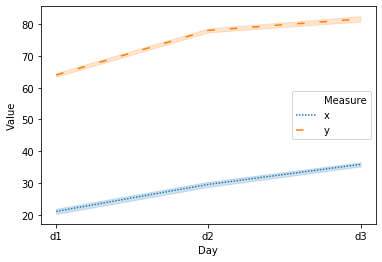

In [48]:
sns.lineplot('Day', 'Value', hue='Measure',
             style='Measure', 
             dashes=[(1, 1), (5, 10)], 
             data=df2)

### How to Change the color (palette) of the Seaborn Lineplot
Next, we'll work with the palette:

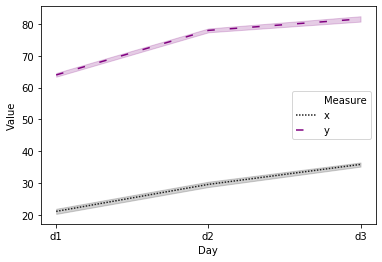

In [49]:
pal = sns.dark_palette('purple',2)

sns.lineplot('Day', 'Value', hue='Measure',
             style='Measure', palette=pal,
             dashes=[(1, 1), (5, 10)], 
             data=df2)

### How to Add Dots (markers) to the Seaborn Line Plot
We can also make it easier to read the plot by adding markers:

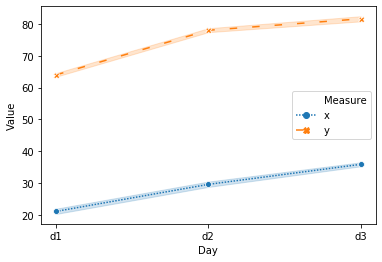

In [50]:
sns.lineplot('Day', 'Value', hue='Measure',
             style='Measure', markers=True,
             dashes=[(1, 1), (5, 10)], 
             data=df2)

Alternatively, we can have the same marker type (dots) on all points en measurements:

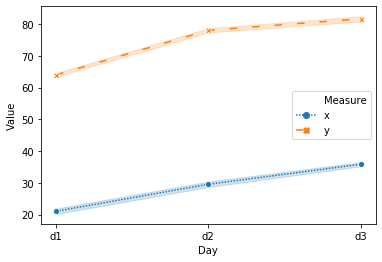

In [51]:
sns.lineplot('Day', 'Value', hue='Measure',
             style='Measure', markers=True,
             dashes=[(1, 1), (5, 10)], 
             data=df2)

## Seaborn Line plot with Dates on the x-axis: Time Series
Here's how to read a CSV file, and make a line plot:

In [52]:
data_csv = 'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Wage.csv'

df = pd.read_csv(data_csv, index_col=0)
df.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


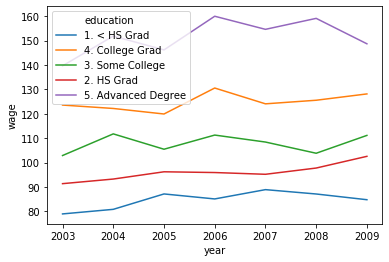

In [53]:
sns.lineplot('year', 'wage', ci=None, 
             hue='education', data=df)

### Moving the Legend:
The legend is a not where we want it. Let's move it:

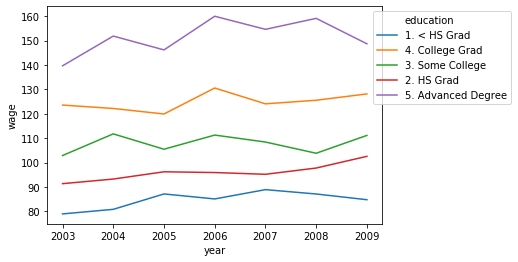

In [54]:
lp = sns.lineplot('year', 'wage', ci=None, 
             hue='education', data=df)
lp.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

### Multiple Lines in a Line Plot (Seaborn) with two categories:
Here's how we can plot two Seaborn line plots based on one variable (two factors):

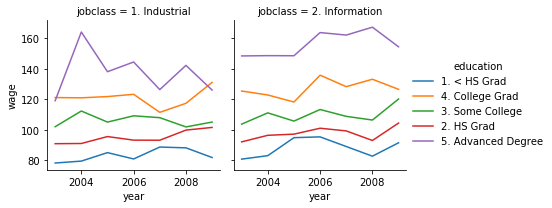

In [55]:
g = sns.FacetGrid(df, col='jobclass', hue='education')
g = g.map(sns.lineplot, 'year', 'wage', ci=None).add_legend()

## Reading Covid Cases in Sweden from Wikipedia Table
Here's the code for the first line plot (time series) of covid-19 cases in Sweden. Note, this part of the code _may_ have to be change with time (check [this post](https://www.marsja.se/how-to-use-pandas-read_html-to-scrape-data-from-html-tables/) for possible updates of this code). 

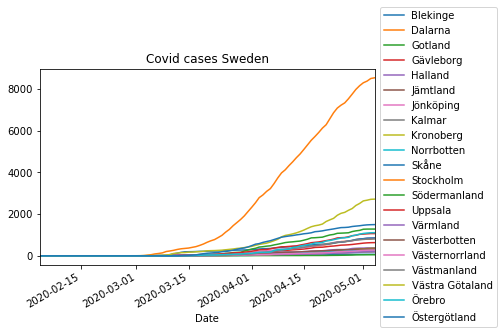

In [56]:
import matplotlib.pyplot as plt

dfs = pd.read_html('https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Sweden',
                  match='New COVID-19 cases in Sweden by county')

df = dfs[0].iloc[:-23, :22].copy()
df.tail()
df.columns = df.columns.get_level_values(1)
df['Date'] = df['Date'].str.replace(r"\[.*?\]","")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df.fillna(0, inplace=True)
df = df.iloc[:,0:22].apply(pd.to_numeric)

df = df.cumsum()

f = plt.figure()

plt.title('Covid cases Sweden', color='black')
df.iloc[:,0:22].plot(ax=f.gca())

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))